# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Q1.1

Gini is a good loss function for categorical target variables because it's efficient and it evaluates how pure a node is. It is fast to cmopute and differntiable for greedy search. Minimizing Gini reduces class mixing which leads to purer splits (the more class mixing the more impure).

Q1.2

Trees tend to overfit becuase they split to perfectly fit noise in trainging data. This tendenacy can be constrained by requiring minimum samples per split or leaf (min_samples_split or min_samples_leaf), limit depth (max_depth), and pruning/ensemble methods like random forests.

Q1.3

False. Trees can perform well in situations with both numeric and categorical predictors as they split based on thesholds or category membership, and not linear relationships.

Q1.4

Most versions of classification/regression tree concept don't allow for more than 2 branches after a split because it is a simpler to search all possible splits, has faster calculations, has easier interpretation/pruning, and has equivalent expressive power as multi splits can be represented in binary.

Q1.5

Some heuristic ways you can examine a tree and decide whether it's probably overfitting is if it's a deep/complex tree and it has high training accuracy and low test accuracy. Some ways you can tell a tree is underfitting is if it is shallow and bohth its train/test accuracies are low. We can use validation curves/cross-validation to check these.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Q2.1

In [5]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/KendallFreese/trees_assignment/main/data/Breast%20Cancer%20METABRIC.csv")
print("Shape:", data.shape)
data.head()


Shape: (2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


Q2.2

In [6]:
# Numeric and categorical variables
num_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
cat_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

# One-hot encode categorical variables
X_cat = pd.get_dummies(data[cat_vars], drop_first=True)
X_num = data[num_vars]

# Combine
X = pd.concat([X_num, X_cat], axis=1)

# Class target
y_class = data['Overall Survival Status']

Q2.3

Accuracy: 0.6166666666666667
Confusion matrix:
 [[163  67]
 [ 94  96]]


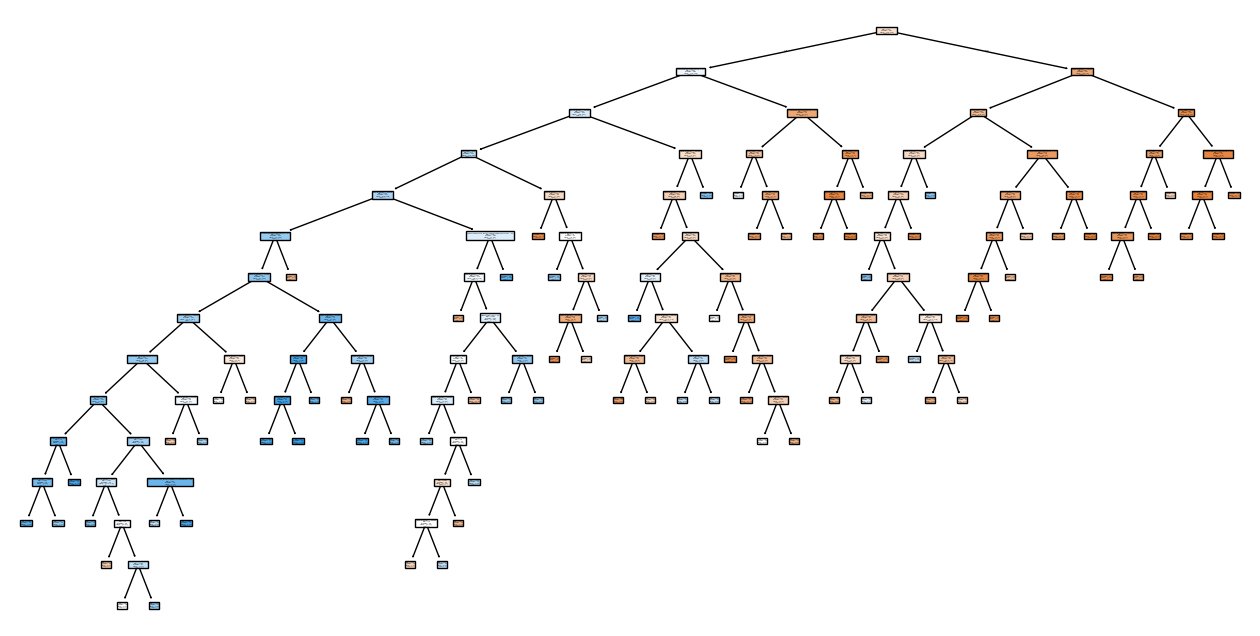

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Drop missing rows
datafr = pd.concat([X, y_class], axis=1).dropna()
Xc = datafr.drop(columns=['Overall Survival Status'])
yc = datafr['Overall Survival Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.3, random_state=0)

# Train decision tree
tree = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Plot tree
plt.figure(figsize=(16, 8))
plot_tree(tree, filled=True, feature_names=Xc.columns, class_names=['0', '1'])
plt.show()

Q2.4

In [9]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

TPR = tp / (tp + fn)  # Sensitivity
TNR = tn / (tn + fp)  # Specificity

print("True Positive Rate (Sensitivity):", round(TPR, 3))
print("True Negative Rate (Specificity):", round(TNR, 3))

True Positive Rate (Sensitivity): 0.505
True Negative Rate (Specificity): 0.709


This model tends to perform better with respect to the specificity metric at 0.709 compared to the sensitivity metric of 0.505.

Q2.5

Best min_samples_leaf: 65
Best R squared: 0.132


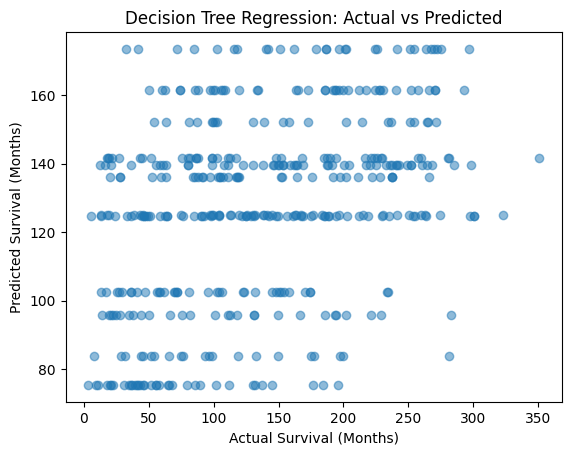

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Drop missing rows for regression
y_reg = data['Overall Survival (Months)']
df_reg = pd.concat([X, y_reg], axis=1).dropna()

Xr = df_reg.drop(columns=['Overall Survival (Months)'])
yr = df_reg['Overall Survival (Months)']

X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.3, random_state=0)

best_r2 = -999
best_leaf = 0

for leaf in range(5, 201, 5):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=0)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_r2:
        best_r2 = score
        best_leaf = leaf

print("Best min_samples_leaf:", best_leaf)
print("Best R squared:", round(best_r2, 3))

# Fit best model
model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()

I wouldn't use this regression tree for clinical purposes. This is because there is low expalantory power with a low R squared value of 0.132 and there is poor calibration on an individual level as points are widely scattered around each band implying indiviudal values are not reliable.  

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?